#**Diseño de solución propuesta**

##**Problema de negocio**
 
La plataforma online requiere una solución que le permita hacer recomendaciones de películas a sus usuarios con el objetivo de que estos tengan una mejor experiencia y esto permita mejorar su fidelización y recomendación a nuevos clientes.


## **Problema analítico**
No existe un algoritmo de recomendación basado en los gustos de los usuarios, que permita generar sugerencias o predecir la utilidad de un ítem específico para un usuario particular. 

##**Diseño de la solución**

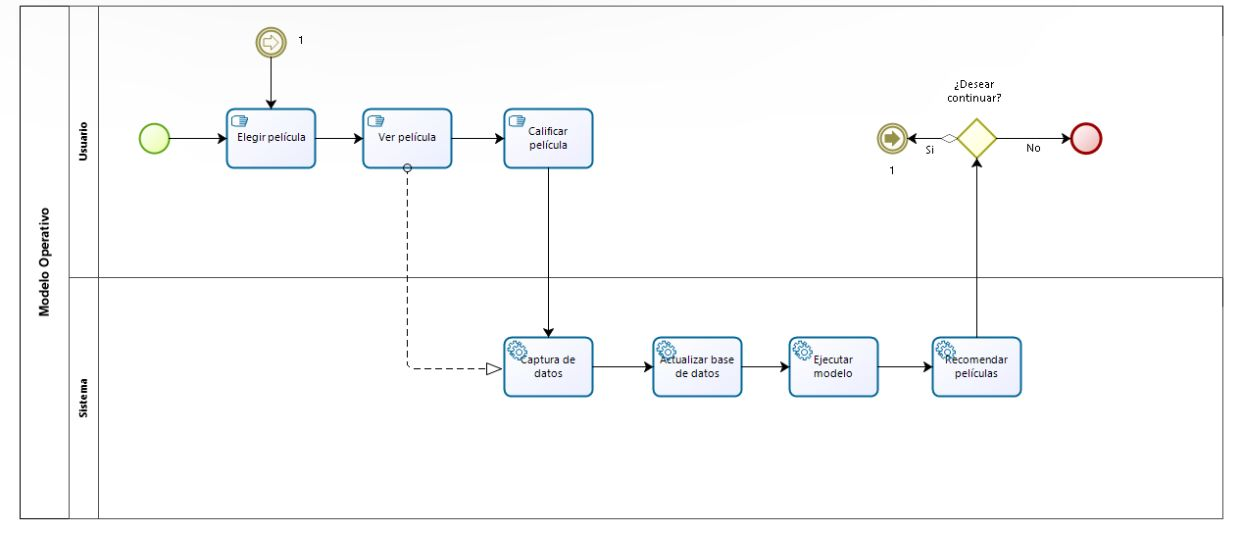

Desde el punto de vista de la implementación operativa se busca diferenciar cuáles son las actvidades genéricas del funcionamiento en el día a día del proceso y quienes serían los responsables. Inicialmente el usuario hace una elección de la película para posteriormente visualizarla y, en el momento en que termine de verla, generar una calificación de la reproducción; en estas dos actividades se hace una captura de datos. Con los registros obtenidos se actualizan las bases de datos para una posterior ejecución del modelo (Con periodicidad diaria) y poder activar las recomendaciones al usuario. El ciclo vuelve a iniciar si el usuario desea permanecer en la plataforma.

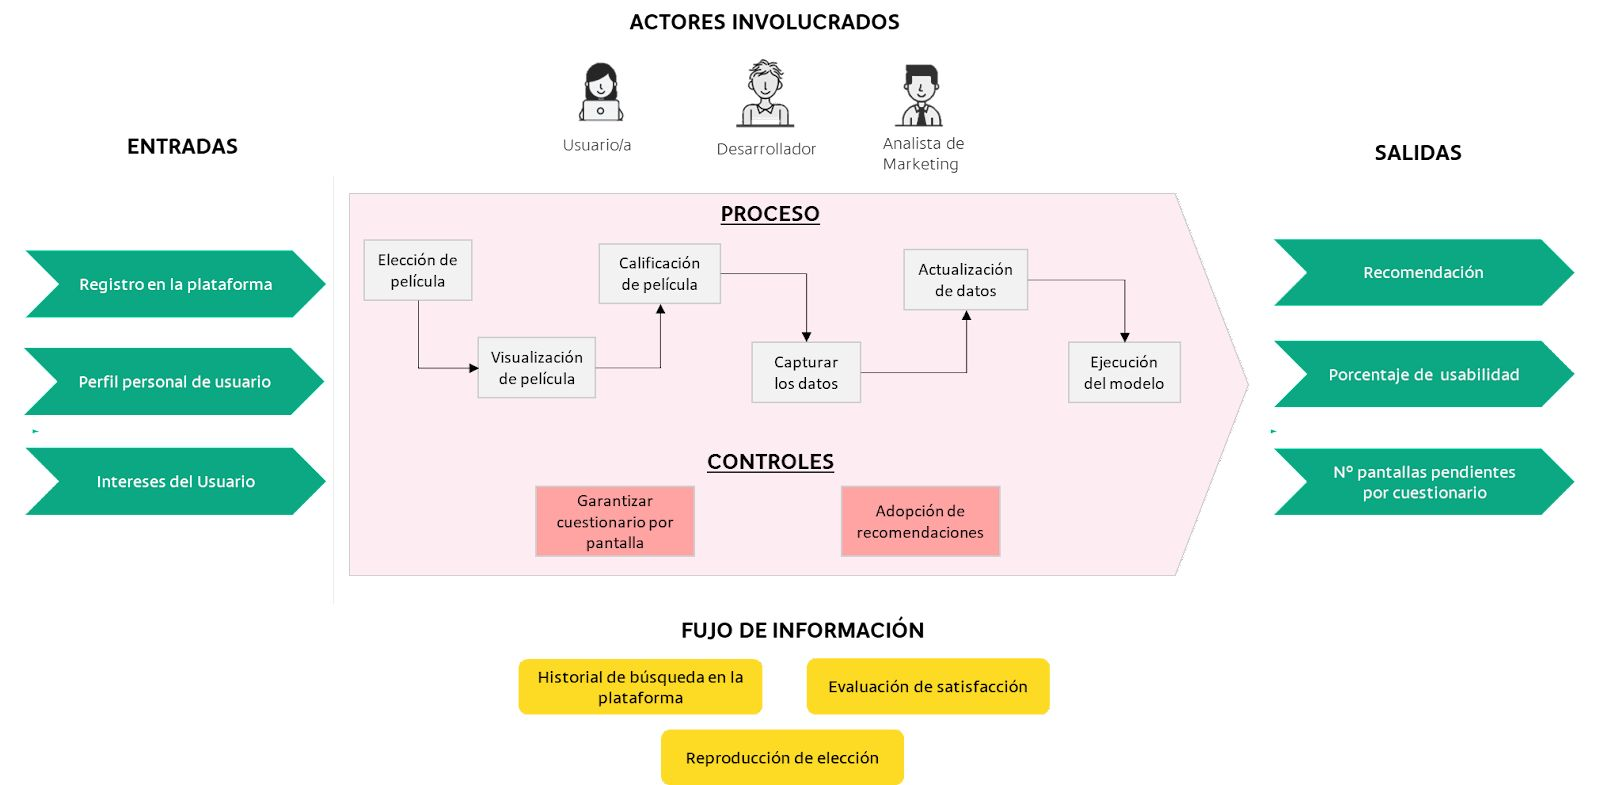

En la búsqueda de dar una mirada integral en la implementación de este modelo, es importante tener en cuenta otras variable adicionales que permiten un buen desarrollo, entre estas están:
- Entradas: Se tuvo en cuenta el registro de la plataforma de los ususario como entrada principal y la segmentación del perfil personal y de intereses de ellos por medio de un cuestionario en el momento en que ingresen por primera vez.
- Proceso: Son las actviidades mencionadas en el modelo operativo anterior
- Controles: En todo proceso existen riesgos operativos que de alguna manera impactan el normal comportamiento, se identificaron dos riesgos y por lo tanto, se proponen dos controles: Garantizar cuestionario por pantalla (El diligenciamiento del cuestionario de segmentación de perfil e intereses) y adopción de recomendaciones (Revisión de la reproducción de peliculas recomendadas)
- Flujo de información: Se consideraron aquellos movimientos de datos que van surgiendo en el momento en que ocurre el proceso, entre estos están las búsquedas realizadas por el usuario, la reproducción de la película y la evaluación de satisfacción de esta.
- Actores involucrados: Es importante identificar qué recursos humanos aportan al proceso de alguna manera, por tal motivo, los principales actores involucrados son el Usuario, el encargado de desarrollar el modelo y demás propuestas analíticas y, por ultimo, el analista de marketin quien apoya desde la estrategia del mercado.
- Salidas: Estas guardan relación con los resulados del proceso y los controles. La salida principal es la recomendación dada al usuario, la idea es analizar la frecuencia de los tipos de recomendación para diseñar e implementar  estrategias de atracción de usuarios; la segunda salida es referente al porcentaje de usabilidad de las recomendaciones, este indicador tiene planteado inicialmente un valor aceptable para que, en caso de que este porcentaje no cumpla la especificación, se evalúen nuevas recomendaciones o incluso cambios en el modelo; por ultimo, la salida que indica la cantidad de pantallas pendientes por cuestionario, este hace referencia a poder diseñar recordatorios de manera que los usuarios tengan interes por dar a conocer mas de ellos.

# **Comprensión, limpieza transformaciones iniciales**

##**Importar datos y paquetes de datos**

In [ ]:
#Importar datos desde drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar paquetes de datos
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.graph_objs as go ### para gráficos


In [ ]:
conn=sql.connect('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/2. Aplicaciones en marketing/db_movies')
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos

In [ ]:
#Consultar nombre de tablas
Tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
Tablas

,name
0,ratings
1,movies
2,final
3,union
4,union1


## **Examinar Tabla "Movies" con la información de las peliculas**

In [ ]:
#Seleccionar tabla de películas
peliculas = pd.read_sql("SELECT* FROM movies", conn)
peliculas.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


**Se procede a examinar las caracteristicas de la tabla, que no posea datos duplicados, nulos y que contengan los mismos formatos**

In [ ]:
peliculas.shape                    #Tamaño
peliculas.columns                  #Nombre columnas
peliculas.dtypes                   #Tipo de variable
peliculas.duplicated().sum()       #Identificar si existen duplicados
print("El tamaño del DF es",peliculas.shape )
print("El nombre de las columnas del DF es",peliculas.columns )
print("El tipo de variable de cada columna es")
print(peliculas.dtypes )
print("El número de datos duplicados son",peliculas.duplicated().sum() )


El tamaño del DF es (9742, 3)
El nombre de las columnas del DF es Index(['movieId', 'title', 'genres'], dtype='object')
El tipo de variable de cada columna es
movieId     int64
title      object
genres     object
dtype: object
El número de datos duplicados son 0


In [ ]:
#No hay numero significante de datos faltantes en la base de datos Insumo 1
print(peliculas.isnull().sum())                   # Número de nulos por variable
print("---------")
print(peliculas.isnull().sum() / peliculas.shape[0])# % de nulos por variable

movieId    0
title      0
genres     0
dtype: int64
---------
movieId    0.0
title      0.0
genres     0.0
dtype: float64


**Se edita la tabla "peliculas" al separar individualmente por columna cada tipo de genero**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
conn=sql.connect('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/2. Aplicaciones en marketing/db_movies')

peliculas =pd.read_sql("SELECT* FROM movies", conn)
generos=peliculas['genres'].str.split('|')
te = TransactionEncoder()
generos = te.fit_transform(generos)
generos = pd.DataFrame(generos, columns = te.columns_)

In [ ]:
generos.head(3)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
peliculas.drop(columns=["genres"], inplace = True)    #Se elimina la columna de géneros en la tabla original.
peliculas= pd.concat([peliculas,generos], axis = 1)   #Se realiza una unión entre la matriz de géneros y la tabla de películas
peliculas.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
dic = {False: 0, True: 1}   #Se reemplazan los falsos y verdaderos por 1 y 0, para facilitar el conteo y posterior visualización en gráficos
peliculas[generos.columns] = peliculas[generos.columns].replace(dic)
peliculas.head(3)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


**En el apartado anterior se modificó y contruyó una tabla partiendo de la original llamada "Movies", esto con el fin de exponer la información posible de una forma más comprensible en pasos posteriores. Esta tabla noc uenta con datos nulos, ni datos atipicos, y de igual manera se separaró la columna género en una columna por tipo de género. Esta tabla es el principal insumo para responder preguntas como el Género de película con mayor número de vistas, etc.**


## **Examinar Tabla "ratings" con la calificación de las peliculas por usuario**

In [ ]:
#Seleccionar tabla ratings
usuarios = pd.read_sql("SELECT* FROM ratings", conn)
usuarios.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [ ]:
usuarios.shape                    #Tamaño
usuarios.columns                  #Nombre columnas
usuarios.dtypes                   #Tipo de variable
usuarios.duplicated().sum()       #Identificar si existen duplicados
print("El tamaño del DF es",usuarios.shape )
print("El nombre de las columnas del DF es",usuarios.columns )
print("El tipo de variable de cada columna es")
print(usuarios.dtypes )
print("El número de datos duplicados son",usuarios.duplicated().sum() )

El tamaño del DF es (100836, 4)
El nombre de las columnas del DF es Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
El tipo de variable de cada columna es
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
El número de datos duplicados son 0


In [ ]:
#No hay numero significante de datos faltantes en la base de datos Insumo 1
print(usuarios.isnull().sum())                   # Número de nulos por variable
print("---------")
print(usuarios.isnull().sum() / usuarios.shape[0])# % de nulos por variable

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
---------
userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64


**Se edita la tabla "Usuarios" al cambiar el tipo de dato en la columna timestamp, por un formato fecha más comodo para el analisis**

In [ ]:
usuarios['date'] =pd.to_datetime(usuarios['timestamp'], unit='s')
usuarios.drop(columns=["timestamp"],inplace=True)
usuarios.head(3)

,userId,movieId,rating,date
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04


**En este apartado, se modifica la tabla llamda "ratings", en la cual se encuentra la información correspondiente al usuario. Esta información, es basicamente, el ID del usuario, el ID de la película vista, la puntiación que el usuario otorgo a esta película, y por ultimo la fecha en formato timestam. Esta fecha fue transformada en un formato más comodo para la visualixación d ela información. Esta tabla es de gran utilidad ya que permite realiar preguntas sobre el usuario que más películas vió, la película mejor calificada, etc.**

##**Unión de las tablas**

In [ ]:
df1= usuarios.merge(peliculas, on='movieId', how='inner')

In [ ]:
df1

,userId,movieId,rating,date,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,Bloodmoon (1997),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,2016-11-19 08:43:18,Sympathy for the Underdog (1971),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,2017-05-03 20:53:14,Hazard (2005),0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,2017-05-03 21:59:49,Blair Witch (2016),0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


**Por ultimo en el apartado de comprensión de los datos, se realixa la uníon entre ambas tablas construidas anteriormente. La uníon se realia por medio de la columna movieId, y posteriormente la tabla creada posee información detallada sobre:**
- **Película**
- **Usuario**
- **Calificación del usuario a la película**

**Esta tabla detallada permitirá responder posteriormente preguntas de interes, que ayuden a conocer de manera más precisa, los gustos de los usuarios en la plataforma. Estos gustos serán clave para la recomendación de posteriores películas para que el disfrute del usuario.**

#**Análisis exploratorio**

**El siguiente análisis exploratiorio tiene como objetivo principal el conocer la población que pertenece a la plataforma de stremings, ya que es a esta población a la que se le recomendarán las peliculas en base a sus gustos.**

**Este analsisi exploratorio responderá 6 preguntas acontinuación, acompañadas de la conssulta en SQL y un grafico que permite visualiar de mejro manera los resultados**

In [ ]:
df1.to_sql("final",conn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


ValueError: ignored

In [ ]:
conn=sql.connect('final')
cur=conn.cursor()

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('final',),
 ('usuarios',),
 ('genero',),
 ('Mes',),
 ('Año',),
 ('Pelicula_Top',),
 ('Promedio_Calificación',)]

### **¿Cuáles son los 10 usuarios que más películas calificaron?**

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists usuarios; 

CREATE TABLE usuarios AS 
    SELECT Count(userId) as Numeropeliculas,  
            userID as Usuario
    FROM final
    GROUP BY Usuario 
    ORDER By Numeropeliculas desc ;


Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
Usuarios_Top = pd.read_sql("""SELECT  * FROM usuarios""", conn).head(10)
Usuarios_Top['Usuario'] = Usuarios_Top['Usuario'].astype(str)
Usuarios_Top

,Numeropeliculas,Usuario
0,2698,414
1,2478,599
2,2108,474
3,1864,448
4,1346,274
5,1302,610
6,1260,68
7,1218,380
8,1115,606
9,1055,288


In [ ]:
data  = go.Bar( x=Usuarios_Top.Usuario,y=Usuarios_Top.Numeropeliculas,text =Usuarios_Top.Numeropeliculas )
Layout=go.Layout(title="TOP 10 Usuarios con más películas calificadas",xaxis={'title':' ID de usuarios'},yaxis={'title':'Cantidad de películas calificadas'})
go.Figure(data,Layout)

**Las películas tienen tienen una calificación de 0,5 a 5; y todas cuentan con   calificación. Para la grafica anterior, se evidencia el ranking del top 10 usuarios que más películas vieron y, por ende, calificaron. El usuario 414 ha consumido el 28% de las películas disponibles en la plataforma, siendo este el usuario con el mayor número de vistas, de igual manera el usuario ubicado en la posición 10, con ID 288 ha consumido el 11% que representa un total de 1055 películas vistas.**

### **¿Cuáles son los géneros de películas más vistas?**

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists genero; 

CREATE TABLE genero AS 
    SELECT            
                        SUM(Action) as Action, 
                        SUM(Adventure) AS Adventure,  
                        SUM(Animation) AS Animation, 
                        SUM(Children) AS Children, 
                        SUM(Comedy) AS Comedy, 
                        SUM(Crime) AS Crime, 
                        SUM(Documentary) AS Documentary, 
                        SUM(Drama) AS Drama, 
                        SUM(Fantasy) AS Fantasy, 
                        SUM("Film-Noir") AS FilmNoir, 
                        SUM(Horror) AS Horror, 
                        SUM(IMAX) AS IMAX, 
                        SUM(Musical) AS Musical, 
                        SUM(Mystery) AS Mystery, 
                        SUM(Romance) AS Romance, 
                        SUM("Sci-Fi") AS SciFi, 
                        SUM(Thriller) AS Thriller, 
                        SUM(War) AS War, 
                        SUM(Western) AS Western 
    FROM final
    ;

Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
genero = pd.read_sql("""SELECT  * FROM genero""", conn)
genero = genero.transpose().reset_index()
genero = genero.rename(columns={'index': 'Género',0:'Cantidad_de_vistas'}).sort_values('Cantidad_de_vistas', axis=0, ascending=False)
genero

,Género,Cantidad_de_vistas
7,Drama,41928
4,Comedy,39053
0,Action,30635
16,Thriller,26452
1,Adventure,24161
14,Romance,18124
15,SciFi,17243
5,Crime,16681
8,Fantasy,11834
3,Children,9208


In [ ]:
data  = go.Bar( x=genero.Género	,y=genero.Cantidad_de_vistas, text= genero.Cantidad_de_vistas)
Layout=go.Layout(title="Ranking de Géneros",xaxis={'title':' Géneros'},yaxis={'title':'Cantidad de Vistas'})
go.Figure(data,Layout)

**En la gráfica anterior se evidencia que el género Drama, se enecuentra en el top del género más consumido por los usuarios. En comparación, el género menos visto es FilmNoir con un 200% menos vistas que el género Drama.**

### **¿Cuál es el mes con más visualizaciones?** 

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists Mes; 

CREATE TABLE Mes AS 
    SELECT strftime('%m', date) Mes,   
             SUM(Action) as Action, 
                        SUM(Adventure) AS Adventure,  
                        SUM(Animation) AS Animation, 
                        SUM(Children) AS Children, 
                        SUM(Comedy) AS Comedy, 
                        SUM(Crime) AS Crime, 
                        SUM(Documentary) AS Documentary, 
                        SUM(Drama) AS Drama, 
                        SUM(Fantasy) AS Fantasy, 
                        SUM("Film-Noir") AS FilmNoir, 
                        SUM(Horror) AS Horror, 
                        SUM(IMAX) AS IMAX, 
                        SUM(Musical) AS Musical, 
                        SUM(Mystery) AS Mystery, 
                        SUM(Romance) AS Romance, 
                        SUM("Sci-Fi") AS SciFi, 
                        SUM(Thriller) AS Thriller, 
                        SUM(War) AS War, 
                        SUM(Western) AS Western,
                        SUM(Action+Adventure+Animation+Children+Comedy+Crime+Documentary+Drama+Fantasy+"Film-Noir"+Horror+IMAX+Musical+Mystery+Romance+"Sci-Fi"+Thriller+War+Western)AS Total_Vistas 
    FROM final
GROUP BY Mes;


Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
Mes = pd.read_sql("""SELECT  * FROM Mes""", conn)
#Mes = genero.transpose().reset_index()
#genero = genero.rename(columns={'index': 'Género',0:'Cantidad_de_vistas'}).sort_values('Cantidad_de_vistas', axis=0, ascending=False)
Mes = Mes[['Mes','Total_Vistas']].sort_values('Total_Vistas', axis=0, ascending=False)
Mes = Mes.replace({
    "01":'Enero',
    "02":'Febrero',
    "03":'Marzo',
    "04":'Abril',
    "05":'Mayo',
    "06":'Junio',
    "07":'Julio',
    "08":'Agosto',
    "09":'Septiembre',
    "10":'Octubre',
    "11":'Noviembre',
    "12":'Diciembre'
})

Mes

,Mes,Total_Vistas
4,Mayo,30140
10,Noviembre,26509
7,Agosto,24704
5,Junio,23990
0,Enero,23564
8,Septiembre,23422
2,Marzo,23146
3,Abril,21575
1,Febrero,20112
9,Octubre,19483


In [ ]:
sum(Mes['Total_Vistas']/12)

22869.416666666664

In [ ]:
data  = go.Bar( x=Mes.Mes,y=Mes.Total_Vistas, text= Mes.Total_Vistas)
Layout=go.Layout(title="Ranking de Mes con más vistas",xaxis={'title':' Mes'},yaxis={'title':'Cantidad de vistas'})
go.Figure(data,Layout)

**El mes de Dieciembre respecto al total del mes de Mayo tiene un 38% menos de vistas. En general, el consumo de la plataforma de Streaming se encuentra con un rango de variación +/- 18%  respecto a la media (22869), a excepción del mes de Mayo donde se registra el consumo más alto.**

###**¿Cuál es el año con más visualizaciones?**

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists Año; 

CREATE TABLE Año AS 
    SELECT strftime('%Y', date) Año,   
             SUM(Action) as Action, 
                        SUM(Adventure) AS Adventure,  
                        SUM(Animation) AS Animation, 
                        SUM(Children) AS Children, 
                        SUM(Comedy) AS Comedy, 
                        SUM(Crime) AS Crime, 
                        SUM(Documentary) AS Documentary, 
                        SUM(Drama) AS Drama, 
                        SUM(Fantasy) AS Fantasy, 
                        SUM("Film-Noir") AS FilmNoir, 
                        SUM(Horror) AS Horror, 
                        SUM(IMAX) AS IMAX, 
                        SUM(Musical) AS Musical, 
                        SUM(Mystery) AS Mystery, 
                        SUM(Romance) AS Romance, 
                        SUM("Sci-Fi") AS SciFi, 
                        SUM(Thriller) AS Thriller, 
                        SUM(War) AS War, 
                        SUM(Western) AS Western,
                        SUM(Action+Adventure+Animation+Children+Comedy+Crime+Documentary+Drama+Fantasy+"Film-Noir"+Horror+IMAX+Musical+Mystery+Romance+"Sci-Fi"+Thriller+War+Western)AS Total_Vistas 
    FROM final
GROUP BY Año;

Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
Año = pd.read_sql("""SELECT  * FROM Año""", conn)
#Mes = genero.transpose().reset_index()
#genero = genero.rename(columns={'index': 'Género',0:'Cantidad_de_vistas'}).sort_values('Cantidad_de_vistas', axis=0, ascending=False)
Año = Año[['Año','Total_Vistas']]#.sort_values('Total_Vistas', axis=0, ascending=False)

Año

,Año,Total_Vistas
0,1996,16560
1,1997,4837
2,1998,1409
3,1999,6271
4,2000,26116
5,2001,9674
6,2002,9168
7,2003,10136
8,2004,8412
9,2005,15439


In [ ]:
data  = go.Bar( x=Año.Año,y=Año.Total_Vistas, text= Año.Total_Vistas)
Layout=go.Layout(title="Ranking de vistas por Años",xaxis={'title':' Año'},yaxis={'title':'Cantidad de Vistas'})
go.Figure(data,Layout)

**En este grafico se puede evidenciar el comportamiento de vistas durante 21 años, donde no existe un patron de comportamiento evidente. El año con mayor número de vistas es el 2000, el cual respecto al año 1998 tiene una diferencia muy alta. A partir del 2015 se puede observar estabilidad, con un alto consumo en la plataforma.**

### **¿Cuáles son las 10 películas más vistas?**

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists Pelicula_Top; 

CREATE TABLE Pelicula_Top AS 
    SELECT Count(userId) as Vistas,  
            title as Titulo
    FROM final
    GROUP BY Titulo  
    ORDER By Vistas desc ;

Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
Pelicula_Top = pd.read_sql("""SELECT  * FROM Pelicula_Top""", conn).head(10)
Pelicula_Top

,Vistas,Titulo
0,329,Forrest Gump (1994)
1,317,"Shawshank Redemption, The (1994)"
2,307,Pulp Fiction (1994)
3,279,"Silence of the Lambs, The (1991)"
4,278,"Matrix, The (1999)"
5,251,Star Wars: Episode IV - A New Hope (1977)
6,238,Jurassic Park (1993)
7,237,Braveheart (1995)
8,224,Terminator 2: Judgment Day (1991)
9,220,Schindler's List (1993)


In [ ]:
data  = go.Bar( x=Pelicula_Top.Titulo,y=Pelicula_Top.Vistas,text = Pelicula_Top.Vistas )
Layout=go.Layout(title="TOP 10 películas más vistas",xaxis={'title':' Película'},yaxis={'title':'Cantidad de visualiaciones'})
go.Figure(data,Layout)

**En la gráfica anterior se puede evidenciar el top 10 de las películas más vistas por los usuarios de la plataforma, siendo Forrest Gump la más reproducida** 

### **¿Películas mejor calificadas?**

In [ ]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [ ]:
%%writefile /content/final.sql
DROP TABLE IF exists Promedio_Calificación; 

CREATE TABLE Promedio_Calificación AS 
    SELECT  Count(userID) as Vistas, 
            title as Titulo,
            AVG(rating) as Promedio_Calificación
            
  
    FROM final
    GROUP BY Titulo  
    ORDER BY Vistas desc; 
   

Overwriting /content/final.sql


In [ ]:
ejecutar_sql("/content/final.sql", cur)

In [ ]:
Promedio_Calificación = pd.read_sql("""SELECT  * FROM Promedio_Calificación""", conn).head(10)
Promedio_Calificación= Promedio_Calificación.sort_values('Promedio_Calificación', axis=0, ascending=False)
Promedio_Calificación = round(Promedio_Calificación, 2)
Promedio_Calificación

,Vistas,Titulo,Promedio_Calificación
1,317,"Shawshank Redemption, The (1994)",4.43
5,251,Star Wars: Episode IV - A New Hope (1977),4.23
9,220,Schindler's List (1993),4.22
2,307,Pulp Fiction (1994),4.20
4,278,"Matrix, The (1999)",4.19
0,329,Forrest Gump (1994),4.16
3,279,"Silence of the Lambs, The (1991)",4.16
7,237,Braveheart (1995),4.03
8,224,Terminator 2: Judgment Day (1991),3.97
6,238,Jurassic Park (1993),3.75


In [ ]:
data  = go.Bar( x=Promedio_Calificación.Titulo,y=Promedio_Calificación.Promedio_Calificación,text = Promedio_Calificación.Promedio_Calificación )
Layout=go.Layout(title="TOP 10 Películas más vistas y mejor calificadas",xaxis={'title':' Película'},yaxis={'title':'Calificación promedio'})
go.Figure(data,Layout)

**Segmentando por el top 10 de películas más vistas, en el gráfico anterior se observa en orden de mejor calificadas. A pesar de que Forrest Gump es la más vista, no neceariamente es la pelicícula con mejor calificación promedio; en este caso, la película Shawshank Redemption encabeza el top con una calificación promedio de 4.43**

#**Selección de algoritmos y técnicas de modelado**

### **Sistema de recomendación filtro colaborativo basado en la pelicula**

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ipywidgets import interact ## para análisis interactivo
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import SlopeOne

In [ ]:
peliculas1 = peliculas

In [ ]:
peliculas1 = peliculas1.drop(columns=['movieId','title'])

In [ ]:
peli='Toy Story (1995)'


In [ ]:
ind_pel = peliculas[peliculas["title"]== peli].index.values.astype(int)[0]
correlaciones = peliculas1.corrwith(peliculas1.iloc[ind_pel,:],axis=1)
corr = correlaciones  #.sort_valaues(ascending=False)
corr

0       1.000000
1       0.727607
2       0.192450
3       0.080845
4       0.397360
          ...   
9737    0.577350
9738    0.727607
9739   -0.132453
9740    0.192450
9741    0.397360
Length: 9742, dtype: float64

In [ ]:
def recomendacion(peli = list(peliculas['title'])):
     
    ind_pel=peliculas[peliculas['title']==peli].index.values.astype(int)[0]   
    similar_peli = peliculas1.corrwith(peliculas1.iloc[ind_pel,:],axis=1)
    similar_peli = similar_peli.sort_values(ascending=False)
    top_similar_peli=similar_peli.to_frame(name="correlation").iloc[1:10,]
    top_similar_peli['title']=peliculas["title"]
    
    return top_similar_peli


print(interact(recomendacion))

interactive(children=(Dropdown(description='peli', options=('Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Ol…

<function recomendacion at 0x7f7d3c957b90>


**Este algortimo manual, permite brindar al usuario una recomendación basada en la pelicula vista, sin tener en cuenta los gustos de este. Esta recomendación se fundamenta con base a la correlación entre la película en cuestion y el catálogo disponible.** 

### **Sistema de recomendación filtro colaborativo basado en la usuario**

In [ ]:
df1.to_sql("usuarios",conn)

In [ ]:
conn=sql.connect('usuarios')
cur=conn.cursor()


In [ ]:
ratings=pd.read_sql('select * from usuarios', conn)

In [ ]:
watcher = Reader(rating_scale=(0, 10))

In [ ]:
data   = Dataset.load_from_df(ratings[['userId','movieId','rating']], watcher)

In [ ]:
models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline()] 
results = {}

In [ ]:
for model in models:
 
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result


performance_df = pd.DataFrame.from_dict(results).T
performance_df.sort_values(by='RMSE')



,MAE,RMSE,fit_time,test_time
knns.KNNBaseline,0.669242,0.875911,0.262534,2.395178
knns.KNNWithZScore,0.681140,0.897819,0.268161,2.496273
knns.KNNWithMeans,0.686754,0.898477,0.212709,2.817917
knns.KNNBasic,0.726573,0.948454,0.120639,1.890776


**De los algoritmos puestos a prueba, las 4 opciones tienen resultados en las medidas de error muy similares, donde el modelo con el menor MAE y RMSE es el KNNBaseline. Sin embargo, el algoritmo seleccionado será el KNNBasic donde obtuvo el mejor fit time y test time los cuales consideramos muy importantes debido a los grandes volumnes de datos y capacidad de procesamiento que el modelo puede requerir a medida que el número de usuarios y películas aumente.**

##**Selección de Hiperparametros**

In [ ]:
param_grid = { 'sim_options' : {'name': ['msd','cosine','pearson', 'pearson_baseline'], 
                               'min_support': [1,3,5,7,9],         ### Vecinos minimos necesarios para realixar la predicción  ###Agregar mas agrupaciones
                                'user_based': [False, True]}  ### Basado en usuario (True) o en el items/calificaciones (False)
             }

### MAE

In [ ]:
gridsearchKNNBasic = GridSearchCV(KNNBasic, param_grid, measures=['mae'], \
                                      cv=2, n_jobs=2)
                                    
gridsearchKNNBasic.fit(data)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
gridsearchKNNBasic.best_params["mae"]

{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}}

In [ ]:
gridsearchKNNBasic.best_score["mae"]

0.6987566845115252

###RMSE

In [ ]:
gridsearchKNNBasic = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], \
                                      cv=2, n_jobs=2)
                                    
gridsearchKNNBasic.fit(data)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



In [ ]:
gridsearchKNNBasic.best_params["rmse"]

{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}}

In [ ]:
gridsearchKNNBasic.best_score["rmse"]

0.919709622446676

**La configuración de parametros elegida para este algortimo será:**

-{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}}

**Donde se propone que el número de vecinos mas cercano será 1, a diferencia del modelo estandar donde se proponián 5. Por otro lado el resto de parámetros no tienen variación. La medida de desempeño elegida será Mean Squared Difference y el modelo será basado en las peliculas y no en los usuarios**

## **Despliegue del modelo**

**Se define que la persona encargada de la etapa del despliegue del modelo, es el desarrollador, esta etapa se lleva a cabo buscando que la solución analítica y sus resultados estén disponibles para los usuarios finales. Estos usuarios son:**

-**El analista de Marketing el cual tomará decisiones apartir de la información brindada por los controles.**

-**El desarrollador para el entreno y constante mejora del modelo.**

-**Por ultimo los consumidores de la plataforma, que se veran directamente beneficiados con la implementación y despliegue del modelo al obtener mejores recomendaciones del catálogo disponible.**

**Se usará entonces una predicción en batch, mediante un archivo de datos que se consultará diariamente para el posterior entreno del modelo. El tiempo de ejecución de este archivo de datos permitirá reducir los costos de carga del modelo el cual, debido a las caracteristicas del proceso que realiza, podria durar incluso varias horas y no es viable realizarse varias veces en el día.**